In [56]:
import numpy as np
import pandas as pd
import json
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
def flatten_data_LARGE(file_directory):

    with open(file_directory, 'r') as file:
        data = json.load(file)

    flattened_data = []

    # iterate through each entry in the data
    for entry in data:
        question_id = entry['id']
        ambiguous_question = entry['question']

        # check the type of annotations and process accordingly
        for annotation in entry['annotations']:
            if annotation['type'] == 'multipleQAs':
                for qa_pair in annotation['qaPairs']:
                    flattened_data.append({
                        'id': question_id,
                        'viewed_doc_titles': entry['viewed_doc_titles'][0],
                        'ambiguous_question': ambiguous_question,
                        'disambiguated_question': qa_pair['question'],
                        'answer': qa_pair['answer'][0]
                    })
            elif annotation['type'] == 'singleAnswer':
                flattened_data.append({
                    'id': question_id,
                    'ambiguous_question': ambiguous_question,
                    'disambiguated_question': np.nan,
                    'answer': annotation['answer'][0]
                })

    ambiguous_df = pd.DataFrame(flattened_data)
    return ambiguous_df

In [3]:
file_path = '../../data/LARGE/train.json'
ambiguous_train_LARGE_df = flatten_data_LARGE(file_path)
ambiguous_train_LARGE_df.head()

,id,viewed_doc_titles,ambiguous_question,disambiguated_question,answer
0,-4469503464110108318,The Simpsons,When did the simpsons first air on television?,When did the Simpsons first air on television ...,"April 19, 1987"
1,-4469503464110108318,The Simpsons,When did the simpsons first air on television?,When did the Simpsons first air as a half-hour...,"December 17, 1989"
2,4790842463458965203,NaN,Who played george washington in the john adams...,NaN,David Morse
3,-6631915997977101143,Marriage age in the United States,What is the legal age of marriage in usa?,"What is the legal age of marriage, without par...",18 years of age
4,-6631915997977101143,Marriage age in the United States,What is the legal age of marriage in usa?,"What is the legal age of marriage, without par...",19


In [4]:
print(len(ambiguous_train_LARGE_df))

19541


In [5]:
def read_json_in_chunks(file_path, chunk_size=1000):
    with open(file_path, 'r') as file:
        chunk = []
        for line in file:
            chunk.append(json.loads(line))
            if len(chunk) >= chunk_size:
                yield chunk
                chunk = []
        if chunk:
            yield chunk

# Example usage
for chunk in read_json_in_chunks(file_path):
    # Process each chunk here
    # For example, convert chunk to DataFrame and process
    df = pd.DataFrame(chunk)
    # Your processing logic...


In [6]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,10026,10027,10028,10029,10030,10031,10032,10033,10034,10035
0,"{'viewed_doc_titles': ['The Simpsons'], 'used_...",{'viewed_doc_titles': ['John Adams (miniseries...,{'viewed_doc_titles': ['Marriage age in the Un...,"{'viewed_doc_titles': ['Barefoot in the Park',...",{'viewed_doc_titles': ['Timeline of the Manhat...,"{'viewed_doc_titles': ['Frozen Ever After'], '...","{'viewed_doc_titles': ['Deccan Plateau'], 'use...",{'viewed_doc_titles': ['Georgia Bulldogs baske...,{'viewed_doc_titles': ['Play That Funky Music'...,{'viewed_doc_titles': ['History of aerial warf...,...,"{'viewed_doc_titles': ['Lookin' for Love'], 'u...",{'viewed_doc_titles': ['Make You Feel My Love'...,{'viewed_doc_titles': ['Presiding Officer of t...,{'viewed_doc_titles': ['Friday the 13th (1980 ...,"{'viewed_doc_titles': ['Charles O'Hara', 'Char...",{'viewed_doc_titles': ['Category:Summer holida...,{'viewed_doc_titles': ['10 Things I Hate About...,{'viewed_doc_titles': ['List of people who wer...,"{'viewed_doc_titles': ['Wonder Woman', 'Wonder...","{'viewed_doc_titles': ['Air Jordan'], 'used_qu..."


In [24]:
# first_row = df.iloc[0][0]
# print(first_row)

In [25]:
file_path = '../../data/LARGE/dev.json'
ambiguous_dev_LARGE_df = flatten_data_LARGE(file_path)
ambiguous_dev_LARGE_df.head()

,id,ambiguous_question,disambiguated_question,answer,viewed_doc_titles
0,-807825952267713091,Who plays the doctor in dexter season 1?,NaN,Tony Goldwyn,NaN
1,8266116451988110240,How often does spermatogeneis—the production o...,NaN,usually continues uninterrupted until death,NaN
2,8266116451988110240,How often does spermatogeneis—the production o...,NaN,constant,NaN
3,7336174019902289593,When was the first remote control tv invented?,NaN,1950,NaN
4,7336174019902289593,When was the first remote control tv invented?,NaN,1950,NaN


In [26]:
print(len(ambiguous_dev_LARGE_df))

6632


In [27]:
ambiguous_train_LARGE_cleaned_df = ambiguous_train_LARGE_df.dropna(subset=['disambiguated_question'])
print(len(ambiguous_train_LARGE_cleaned_df))

14082


In [147]:
ambiguous_dev_LARGE_cleaned_df = ambiguous_dev_LARGE_df.dropna(subset=['disambiguated_question'])
print(len(ambiguous_dev_LARGE_cleaned_df))
ambiguous_dev_LARGE_cleaned_df.head()

4856


,id,ambiguous_question,disambiguated_question,answer,viewed_doc_titles
6,8630912480840635425,Why did the st louis cardinals move to arizona?,What ability caused the st louis cardinals mov...,overall mediocrity of the Cardinals,History of the St. Louis Cardinals (NFL)
7,8630912480840635425,Why did the st louis cardinals move to arizona?,What physical issue caused the st louis cardin...,old stadium,History of the St. Louis Cardinals (NFL)
8,8630912480840635425,Why did the st louis cardinals move to arizona?,What fan issue caused the st louis cardinals m...,game attendance to dwindle,History of the St. Louis Cardinals (NFL)
13,5780388869788119926,Who is the current chairman of african union c...,Who is the 4th chairman of african union commi...,Moussa Faki,Chairperson of the African Union Commission
14,5780388869788119926,Who is the current chairman of african union c...,Who is the 3rd chairman of african union commi...,Nkosazana Clarice Dlamini-Zuma,Chairperson of the African Union Commission


In [148]:
ambiguous_dev_LARGE_cleaned_df = ambiguous_dev_LARGE_cleaned_df.dropna()
num_dev_disambiguous = len(ambiguous_dev_LARGE_cleaned_df)
ambiguous_dev_LARGE_cleaned_df.drop('id', axis=1, inplace=True)
ambiguous_dev_LARGE_cleaned_df.drop('answer', axis=1, inplace=True)
ambiguous_dev_LARGE_cleaned_df.drop('viewed_doc_titles', axis=1, inplace=True)
ambiguous_dev_LARGE_cleaned_df.head()

,ambiguous_question,disambiguated_question
6,Why did the st louis cardinals move to arizona?,What ability caused the st louis cardinals mov...
7,Why did the st louis cardinals move to arizona?,What physical issue caused the st louis cardin...
8,Why did the st louis cardinals move to arizona?,What fan issue caused the st louis cardinals m...
13,Who is the current chairman of african union c...,Who is the 4th chairman of african union commi...
14,Who is the current chairman of african union c...,Who is the 3rd chairman of african union commi...


In [29]:
ambiguous_train_LARGE_cleaned_df = ambiguous_train_LARGE_cleaned_df.dropna()
num_train_disambiguous = len(ambiguous_train_LARGE_cleaned_df)
ambiguous_train_LARGE_cleaned_df.drop('id', axis=1, inplace=True)
ambiguous_train_LARGE_cleaned_df.drop('answer', axis=1, inplace=True)
ambiguous_train_LARGE_cleaned_df.head()

,viewed_doc_titles,ambiguous_question,disambiguated_question
0,The Simpsons,When did the simpsons first air on television?,When did the Simpsons first air on television ...
1,The Simpsons,When did the simpsons first air on television?,When did the Simpsons first air as a half-hour...
3,Marriage age in the United States,What is the legal age of marriage in usa?,"What is the legal age of marriage, without par..."
4,Marriage age in the United States,What is the legal age of marriage in usa?,"What is the legal age of marriage, without par..."
5,Marriage age in the United States,What is the legal age of marriage in usa?,"What is the legal age of marriage, without par..."


In [13]:
print(len(ambiguous_train_LARGE_cleaned_df))

14082


In [44]:
print(len(ambiguous_train_LARGE_cleaned_df['viewed_doc_titles'].unique()))

4130


In [14]:
print("There are", len(ambiguous_train_LARGE_cleaned_df['viewed_doc_titles'].unique()), "topics.")

There are 4130 topics.


In [65]:
def catgorize_question_type(df):
    # df['question_type'] = df['ambiguous_question'].str.split().str[0]
    # return df
    
    standard_types = ['Who', 'What', 'Where', 'When', 'How']

    # Extract the first word and categorize
    df['question_type'] = df['ambiguous_question'].str.split().str[0]
    df['question_type'] = df['question_type'].apply(lambda x: x if x in standard_types else 'Other')

    return df

results_df = catgorize_question_type(ambiguous_train_LARGE_cleaned_df)
results_df.head()

,viewed_doc_titles,ambiguous_question,disambiguated_question,question_type
0,The Simpsons,When did the simpsons first air on television?,When did the Simpsons first air on television ...,When
1,The Simpsons,When did the simpsons first air on television?,When did the Simpsons first air as a half-hour...,When
3,Marriage age in the United States,What is the legal age of marriage in usa?,"What is the legal age of marriage, without par...",What
4,Marriage age in the United States,What is the legal age of marriage in usa?,"What is the legal age of marriage, without par...",What
5,Marriage age in the United States,What is the legal age of marriage in usa?,"What is the legal age of marriage, without par...",What


In [73]:
results_df_copy = results_df.copy()
results_df_copy = results_df_copy.drop(columns = 'disambiguated_question')
results_df_copy = results_df_copy.drop_duplicates(subset='ambiguous_question')
results_df_copy.head()
# print(len(results_df_copy))

,viewed_doc_titles,ambiguous_question,question_type
0,The Simpsons,When did the simpsons first air on television?,When
3,Marriage age in the United States,What is the legal age of marriage in usa?,What
7,Barefoot in the Park,Who starred in barefoot in the park on broadway?,Who
13,Timeline of the Manhattan Project,When did the manhattan project began and end?,When
17,Georgia Bulldogs basketball,When was the last time uga won a national cham...,When


In [79]:
list(results_df_copy['question_type'].unique())
# print(ambiguous_train_LARGE_cleaned_df[ambiguous_train_LARGE_cleaned_df['question_type']=="Full"]['ambiguous_question'])

['When', 'What', 'Who', 'Other', 'How', 'Where']

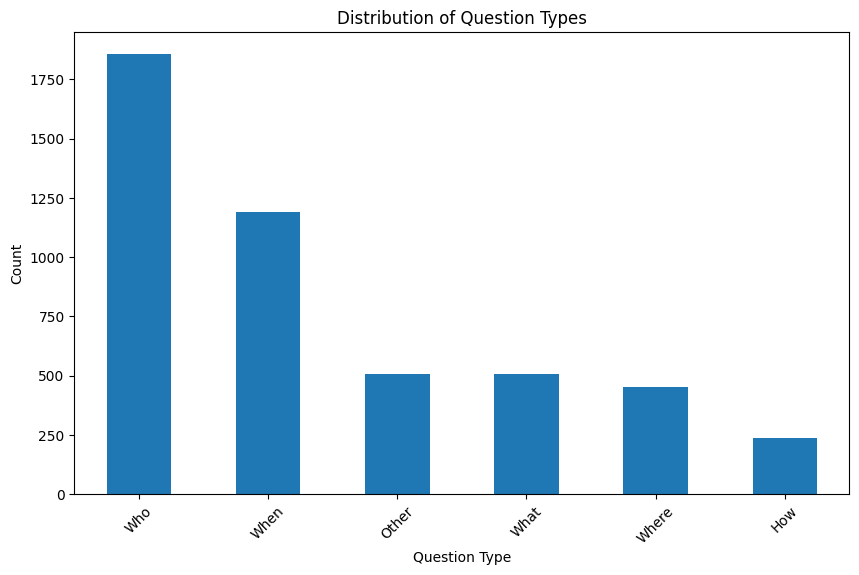

In [80]:
def plot_question_type_distribution(df):
    
    question_type_counts = df['question_type'].value_counts()

    # Plotting the bar graph
    plt.figure(figsize=(10, 6))
    question_type_counts.plot(kind='bar')
    plt.title('Distribution of Question Types')
    plt.xlabel('Question Type')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()
    
plot_question_type_distribution(results_df_copy)

In [2]:
def plot_question_type_pie_chart(df):
    """
    This function takes a pandas DataFrame with a column named 'question_type'
    and plots a pie chart showing the distribution of different question types.

    Parameters:
    df (pandas.DataFrame): The DataFrame containing the 'question_type' column.
    """
    # Check if 'question_type' column exists
    if 'question_type' not in df.columns:
        raise ValueError("DataFrame must contain a column named 'question_type'.")

    # Count the occurrences of each question type
    question_type_counts = df['question_type'].value_counts()

    # Plotting the pie chart
    plt.figure(figsize=(10, 8))
    question_type_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140)
    plt.title('Distribution of Unique Ambiguous Question Types')
    plt.ylabel('')  # Hide the y-label
    plt.show()
    
plot_question_type_pie_chart(results_df_copy)

NameError: name 'results_df_copy' is not defined

In [134]:
def stratified_split(df, stratify_col, test_size):
    train_df, test_df = train_test_split(df, test_size = test_size, stratify=df[stratify_col])
    return train_df, test_df

train_df, test_df = stratified_split(results_df_copy, 'question_type', 0.34483738)

In [135]:
print(len(train_df))
train_df.head()

3111


,viewed_doc_titles,ambiguous_question,question_type
4166,Aquamarine (film),Who sang island in the sun in aquamarine?,Who
6761,Mount Pinatubo,What was the first sign that mt. pinatubo had ...,What
420,Stefano DiMera,Who played stefano on days of our lives?,Who
2637,List of presidents of the United States by age,Who has been the youngest president of usa?,Who
17204,Semantic memory,This type of memory contains concepts meaning ...,Other


In [136]:
# join with train_df and results_df
train_df = train_df.merge(results_df, how='left', on=['viewed_doc_titles', 'ambiguous_question', 'question_type'])
print(len(train_df))
train_df.head()

9216


,viewed_doc_titles,ambiguous_question,question_type,disambiguated_question
0,Aquamarine (film),Who sang island in the sun in aquamarine?,Who,"Who from the cast sings ""Island in the Sun"" i..."
1,Aquamarine (film),Who sang island in the sun in aquamarine?,Who,"Who sings ""Island in the Sun"" that is featured..."
2,Mount Pinatubo,What was the first sign that mt. pinatubo had ...,What,What was the first sign that mt. pinatubo had ...
3,Mount Pinatubo,What was the first sign that mt. pinatubo had ...,What,What was the first sign that mt. pinatubo had ...
4,Mount Pinatubo,What was the first sign that mt. pinatubo had ...,What,What was the first sign that mt. pinatubo had ...


In [137]:
print(len(test_df))
test_df.head()

1638


,viewed_doc_titles,ambiguous_question,question_type
15416,List of The Chronicles of Narnia (film series)...,Who plays the queen in chronicles of narnia?,Who
17847,New York Knicks,How many championships do new york knicks have?,How
7436,"Vidor, Texas",How far is vidor tx from beaumont tx?,How
6354,List of India national cricket captains,Who is the indian cricket team captain 2018?,Who
14221,List of highest paid American television stars,Who is the highest paid actor in big bang theory?,Who


In [138]:
test_df = test_df.merge(results_df, how='left', on=['viewed_doc_titles', 'ambiguous_question', 'question_type'])
print(len(test_df))
test_df.head()

4866


,viewed_doc_titles,ambiguous_question,question_type,disambiguated_question
0,List of The Chronicles of Narnia (film series)...,Who plays the queen in chronicles of narnia?,Who,Who plays Queen Jadis in Chronicles of Narnia?
1,List of The Chronicles of Narnia (film series)...,Who plays the queen in chronicles of narnia?,Who,Who plays Queen Lilliandil in Chronicles of Na...
2,New York Knicks,How many championships do new york knicks have?,How,How many NBA championships do new york knicks ...
3,New York Knicks,How many championships do new york knicks have?,How,How many Eastern Conference/Division champions...
4,"Vidor, Texas",How far is vidor tx from beaumont tx?,How,How far is Vidor TX from Beaumont TX by car?


In [149]:
test_df.to_csv('../../data/LARGE/test_final_csv', index=False)
train_df.to_csv('../../data/LARGE/train_final_csv', index=False)
ambiguous_dev_LARGE_cleaned_df.to_csv('../../data/LARGE/dev_final_csv', index=False)